# Naive Bayes 

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Dataset

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The classification task for this dataset is to determine whether a given email is spam or not.
	
Our collection of spam e-mails came from our postmaster and individuals who had filed spam.  Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam.  These are useful when constructing a personalized spam filter.  One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

For background on spam: Cranor, Lorrie F., LaMacchia, Brian A.  Spam!, Communications of the ACM, 41(8):74-83, 1998.

https://archive.ics.uci.edu/dataset/94/spambase

In [50]:
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'class'
]



df = pd.read_csv('/home/mthobisi/Desktop/Python Libs/CS50/Python/CSV files/spambase.data', header=None, names=column_names)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<Axes: >

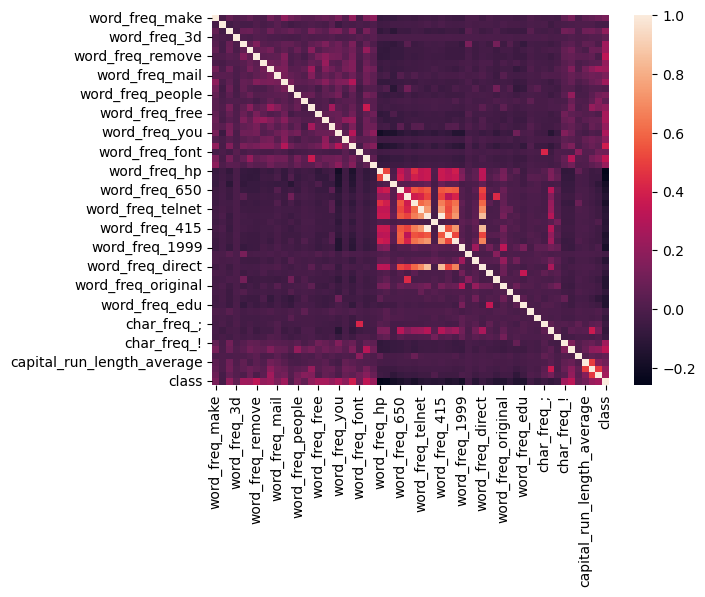

In [51]:
sns.heatmap(df.corr())

# Training, Validation and Testing 

In [52]:
X =  df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [53]:
# Value count
y.value_counts()

class
0    2788
1    1813
Name: count, dtype: int64

In [54]:
# Assign the model
naive_bayes_model = GaussianNB()

# Training the model
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [55]:
# Improve accuracy of the model by cross validation anad prevent overfitting
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


param_dist = {
    'var_smoothing': np.logspace(-9, 0, 100)  # Randomly sample from a wide range
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=naive_bayes_model, param_distributions=param_dist, 
                                n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Best Parameters: {'var_smoothing': 1e-06}
Test Set Accuracy: 0.84


In [56]:
# Testing the modelprint
y_pred = naive_bayes_model.predict(X_test)

# Accuracy and Classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8208469055374593

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

